# Introduction

## Exercise 1. Exact solution

We represent a weighted, non-oriented graph with an adjacency list. We also assume
that a graph is always connected, i.e. that it is always possible to reach a node from any
other node.

- *In a complete graph, all nodes are connected to one another. What is the number of Hamiltonian paths in a complete graph of size n?*



Among a set N of n nodes, we can describe each Hamilton path as an ordered combinaison of all ellements of N. It's an arrangment. In a complete graph, all nodes are conected so all arrangment n describe an Hamilton path.The number of possible arrangement ${\displaystyle A_{n}^{n}}=n!$ 

The number of Hamiltonian paths in a complete graph of size n is $n!$

- *Write a Python function that enumerates all Hamiltonian paths starting from a node i in a graph of size n, and returns the shortest one. What is its time complexity?*

We build a recursive function that return the list of all existing Hamiltonian paths. Complexity: (n-1)!

In [1]:
import networkx as nx

In [2]:

def HamiltonRecursiveLister(PathList_,Path,Graph,Curentnode): 
    Path.append(Curentnode)
    if len(Path)==Graph.number_of_nodes():
        PathList_.append(Path.copy())
        del Path[-1]
    else:
        for node in Graph.neighbors(Curentnode):
            if node not in Path:
                PathList_=HamiltonRecursiveLister(PathList_,Path,Graph,node)
        del Path[-1]
                
    
    return PathList_
    

We build a test to see if our function worl properly.

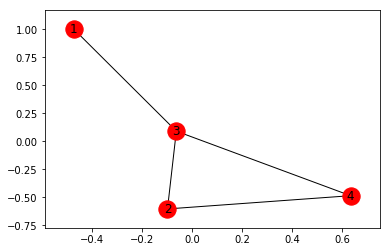

In [46]:
import matplotlib.pyplot as plt
testG= nx.Graph()
testG.add_nodes_from([1,2,3,4])
testG.add_weighted_edges_from([(3, 1,1),(3,2,2),(4,2,1),(3,4,1)])
nx.draw_networkx(testG)

In [4]:
print(HamiltonRecursiveLister([],[],testG,1)==[[1, 3, 2, 4], [1, 3, 4, 2]],HamiltonRecursiveLister([],[],testG,2)==[[2, 4, 3, 1]],HamiltonRecursiveLister([],[],testG,3)==[],HamiltonRecursiveLister([],[],testG,4)==[[4, 2, 3, 1]])

True True True True


It work.

We now build a recursive function that enumerates all Hamiltonian paths starting from a node i in a graph of size n, and returns the shortest one

In [5]:
#HamiltonRecursiveFinder. Prend en parametre un graphe de taille N et un noeud i
def HRF(Graph,Curentnode,BestPath=[],Bestlength=-1,Pathlength=0,CurentPath=[]): 
    CurentPath.append(Curentnode) #C=O(1)
    if len(CurentPath)==Graph.number_of_nodes(): #C=O(1) (we assume this number is not calculated)
        if Bestlength>Pathlength or Bestlength==-1: #C=O(1)
            BestPath=CurentPath.copy() #C=O(N)
            Bestlength=Pathlength #C=O(1)
        del CurentPath[-1]
    else:
        for node in Graph.neighbors(Curentnode): #C=(n-1)*C(HRF(graphe de taille n-1))
            if node not in CurentPath:#C=O(1)
                length=Pathlength+Graph[Curentnode][node]['weight']#C=O(1)
                if length < Bestlength  or Bestlength==-1:#C=O(1)
                    BestPath, Bestlength=HRF(Graph,node,BestPath,Bestlength,length,CurentPath)#C=O(HRF(graphe de taille n-1)
        del CurentPath[-1] #C=O(1)
                
    
    return BestPath, Bestlength

We test it

In [6]:

print(HRF(testG,1)==([1, 3, 4, 2], 3))

True


It work
For a graph of size N, the time complexity is $N*(N-1)!=N!$

- *Finally, write a Python function that finds an exact solution to the Traveling SalesmanProblem for a graph of size n.*

We jeust need to applly our HRF function to each nodes of the graph and find the best one

In [7]:
#Traveling Salesman Problem Solver C=O(n*n!)
def TSPS(Graph):#C=O(1)
    Path=[]#C=O(1)
    length=-1#C=O(1)
    for node in Graph.nodes(): #C=O(n*n!)
        P,d= HRF(Graph,node) #C=O(n!)
        if (d<length or length==-1)and d!=-1:
            Path=P
            length=d
    return Path,length
        

In [8]:
TSPS(testG)

([1, 3, 4, 2], 3)

## Exercise 2. The Nearest Neighbor heuristic

- *Write a function that implements the Nearest Neighbor heuristic.*

In [9]:
def NNH(Graph,node):
    Path=[node]#C=O(1)
    N=len(Graph)#C=O(1)
    while len(Path)<N:#C=O(n^2)
        successor=-1 #C=O(1)
        d=-1 #C=O(1)
        for nd in Graph.neighbors(node): #C=O(n)
            if nd not in Path and (Graph[nd][node]['weight']<d or d==-1): #C=O(1)
                successor =nd #C=O(1)
                d=Graph[nd][node]['weight'] #C=O(1)
        if successor==-1: return [] 
        node=successor #C=O(1)
        Path.append(node) #C=O(1)
    return Path

In [10]:
NNH(testG,1)

[1, 3, 4, 2]

- *What is its time complexity?*

We have a time complexity C=O(n^2)

- *Find a graph for which this heuristic does not compute the shortest Hamiltonian path.*

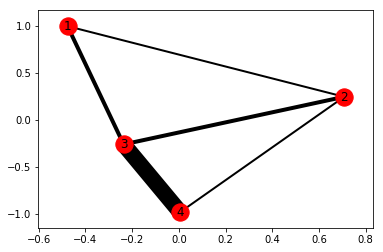

In [11]:
trapG= nx.Graph()
trapG.add_nodes_from([1,2,3,4])
trapG.add_weighted_edges_from([(1, 2,1),(1,3,2),(2,3,2),(2,4,1),(3,4,8)])
pos = nx.spring_layout(trapG)
nx.draw_networkx_nodes(trapG, pos)
nx.draw_networkx_labels(trapG, pos)
for edg in trapG.edges():
     nx.draw_networkx_edges(trapG, pos, edgelist=[edg],
                       width=2*trapG[edg[0]][edg[1]]["weight"])

In [12]:
print("shortest Hamiltonian path : ",HRF(trapG,1),", solution with NNH:",(NNH(trapG,1)))



shortest Hamiltonian path :  ([1, 3, 2, 4], 5) , solution with NNH: [1, 2, 4, 3]


## Exercise 3. The Minimum Spanning Tree heuristic

A spanning tree of a graph G = (V, E) is a subset F of its edges such that (V, F ) is a
tree. A minimum spanning tree (MST) of a graph is a spanning tree that minimizes the sum
of the weights of its edges.

Here is an algorithm that computes a minimum spanning tree (Prim’s algorithm).

Data: Graph G = (V, E)

Result: (V, F ) a MST

F ←∅

W ← x 0 an arbitrary element

while W != V do

    Let (x, y) ∈ E the shortest edge such that x ∈ W and y ∈/ W

    W ← W ∪ y

    F ← F ∪ (x, y)

end

Result: (V, F)

- *Using an appropriate data structure, what is the time complexity of this algorithm?*


- *Prove that during each iteration of the while loop, the subgraph (W, F ) is a tree. Deduce that Prim’s algorithm returns a spanning tree.*



Mathematical induction:

    Base case: W=x0, F=∅, is a tree: (WF) is Acyclic and Connected
    
    Induction step: lets assume that the subgraph (W, F ) is a tree, we show that (W U y,F ∪ (x, y)) is a tree, with (x, y) ∈ E the shortest edge such that x ∈ W and y ∈/ W
    
        if we remoove any edge e of F, (W,F) is disconected by deffinition of a tree. it form two conected subgraph W1,W2. x∈W1 (resp W2). y∈/W1 et y∈/W2 and y is conected to W1 (resp W2). (W U y =W1 U y +W2 ,F ∪ (x, y) /{e}) is deisconected. If we remove the edge (x,y), there is, by construction, no edge betwin y and W. (W U y,F ) is disconected. If we remoove any edge from (W U y,F ∪ (x, y)), it is disconected. thus (W U y,F ∪ (x, y)) is a tree
    
    Conclusion: during each iteration of the while loop, the subgraph (W, F ) is a tree.
    
    At the end of Prim’s algorithm (W, F) is a tree, V=W and F∈E. Prim’s algorithm returns a spanning tree of Graph (V,E)

- *Show that the result of Prim’s algorithm is a MST.*


- *Write a Python function that implements Prim’s algorithm.*


In [44]:
import numpy as np
def Prims(Graph):
    V=set(Graph.nodes)
    edges=list(trapG.edges())
    sort=np.argsort([trapG[edg[0]][edg[1]]["weight"]for edg in edges])
    E=[edges[s] for s in sort]
    F=[]
    W={list(Graph.nodes())[0]}
    while len(W)<len(V):#C= O(n³ln(n))
        for edge in E:#C=O(len(edge)*ln(len(n))) = O(n²ln(n))
            if (edge[0] not in W and edge[1] in W): #C=O(ln(len(W))) =O(ln(n))
                F.append(edge) #C=O(1)
                W.add(edge[0]) #C=O(1)
                break
            elif (edge[1]not in W and edge[0] in W):#C=O(ln(len(W)) =O(ln(n))
                F.append(edge)#C=O(1)
                W.add(edge[1])#C=O(1)
                break
    return (W,F)
        

In [45]:
W,F=Prims(trapG)


{1, 2, 3, 4} [(1, 2), (2, 4), (1, 3)]


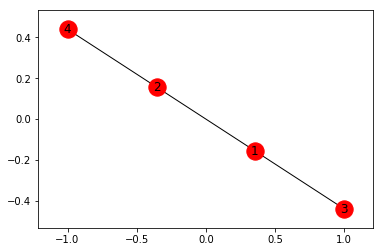

In [47]:
tree= nx.Graph()
tree.add_nodes_from(W)
tree.add_edges_from(F)
nx.draw_networkx(tree)

 The triangular inequality is the following inequality:∀x, y, z ∈ V, w(x, z) ≤ w(x, y) + w(y, z),where w(x, y) is the weight of edge x → y (more direct paths are shorter).

- *Assumingthat the graph verifies the triangle inequality, show that the length of the Hamiltonian cycle obtained by visiting the MST is less than twice the length of the shortestHamiltonian cycle of the graph.*